In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import (cluster,
                     datasets,
                     decomposition,
                     discriminant_analysis,
                     dummy,
                     ensemble,
                     feature_selection as ftr_sel,
                     linear_model,
                     metrics,
                     model_selection as skms,
                     multiclass as skmulti,
                     naive_bayes,
                     neighbors,
                     pipeline,
                     preprocessing as skpre,
                     svm,
                     tree)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
import itertools as it
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier
import collections as co

In [2]:
!pip install pandas numpy matplotlib seaborn

In [3]:
# importing the dataset
df = pd.read_csv("train.csv")
# Preview the dataset
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


**Cleaning the data**

In [4]:
# Shape of dataset
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")

# Column types
df.dtypes

# Summary statistics
df.describe(include='all')

# Null values
df.isnull().sum()

Rows: 10999, Columns: 12


ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [5]:
# Standardize column names by stripping whitespace, converting to lowercase, and replacing spaces with underscores for easier access
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

In [6]:
# Remove duplicate rows from the DataFrame
df.drop_duplicates(inplace=True)

In [7]:
# Rename columns for simplicity and readability, then display the DataFrame structure
df.rename(columns={
    'warehouse_block': 'warehouse',
    'mode_of_shipment': 'shipment',
    'customer_care_calls': 'calls',
    'customer_rating': 'rating',
    'cost_of_the_product': 'price',
    'prior_purchases': 'purchases',
    'product_importance': 'important',
    'gender': 'gender',
    'discount_offered': 'discount',
    'weight_in_gms': 'weight',
    'reached.on.time_y.n': 'reached',
}, inplace=True)
# Display summary information about the DataFrame after renaming
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         10999 non-null  int64 
 1   warehouse  10999 non-null  object
 2   shipment   10999 non-null  object
 3   calls      10999 non-null  int64 
 4   rating     10999 non-null  int64 
 5   price      10999 non-null  int64 
 6   purchases  10999 non-null  int64 
 7   important  10999 non-null  object
 8   gender     10999 non-null  object
 9   discount   10999 non-null  int64 
 10  weight     10999 non-null  int64 
 11  reached    10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [8]:
# Generate descriptive statistics for numerical columns
df.describe()

,id,calls,rating,price,purchases,discount,weight,reached
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [9]:
# Display the entire DataFrame
df

,id,warehouse,shipment,calls,rating,price,purchases,important,gender,discount,weight,reached
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [10]:
#encoding the cateorical variables

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [11]:
def get_model_name(model):
    ' return name of model (class) as a string '
    return str(model.__class__).split('.')[-1][:-2]
def rdot(w,x):
    ' apply np.dot on swapped args '
    return np.dot(x,w)

In [12]:
#from our dataset the categorical variables to be encoded are warehouse,shipment,important, gender
from sklearn.preprocessing import LabelEncoder
df=MultiColumnLabelEncoder(columns = ['warehouse','shipment','important', 'gender']).fit_transform(df)
df.head(10)
df.tail(10)

,id,warehouse,shipment,calls,rating,price,purchases,important,gender,discount,weight,reached
10989,10990,1,2,5,1,218,5,2,0,9,1603,0
10990,10991,2,2,5,4,219,6,1,1,3,1098,0
10991,10992,4,2,5,2,261,5,2,1,9,1227,1
10992,10993,3,2,5,1,236,5,2,1,3,1906,0
10993,10994,4,2,5,1,257,6,1,0,1,1150,0
10994,10995,0,2,4,1,252,5,2,0,1,1538,1
10995,10996,1,2,4,1,232,5,2,0,6,1247,0
10996,10997,2,2,5,4,242,5,1,0,4,1155,0
10997,10998,4,2,5,2,223,6,2,1,2,1210,0
10998,10999,3,2,2,5,155,5,1,0,6,1639,0


In [13]:
#adding the new variable -- the average number of prior purchases per warehouse
avr = round(df.groupby('warehouse')['purchases'].mean().reset_index(name='Purchase per warehouse'),4) #https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html
exerdf = pd.merge(df, avr, on='warehouse', how='left')
exerdf.head(10)

,id,warehouse,shipment,calls,rating,price,purchases,important,gender,discount,weight,reached,Purchase per warehouse
0,1,3,0,4,2,177,3,1,0,44,1233,1,3.6020
1,2,4,0,4,5,216,2,1,1,59,3088,1,3.5480
2,3,0,0,2,2,183,4,1,1,48,3374,1,3.5777
3,4,1,0,3,3,176,4,2,1,10,1177,1,3.5750
4,5,2,0,2,2,184,3,2,0,46,2484,1,3.5548
5,6,4,0,3,1,162,3,2,0,12,1417,1,3.5480
6,7,3,0,3,4,250,3,1,0,3,2371,1,3.6020
7,8,4,0,4,1,233,2,1,0,48,2804,1,3.5480
8,9,0,0,3,4,150,3,1,0,11,1861,1,3.5777
9,10,1,0,3,2,164,3,2,0,29,1187,1,3.5750


In [14]:
#adding the new variable
# Count shipments per warehouse
shipment_counts = exerdf.groupby('warehouse')['shipment'].transform('count')
# Add the result as a new column
exerdf['Shipment count per warehouse'] = shipment_counts
exerdf.head()

,id,warehouse,shipment,calls,rating,price,purchases,important,gender,discount,weight,reached,Purchase per warehouse,Shipment count per warehouse
0,1,3,0,4,2,177,3,1,0,44,1233,1,3.6020,1834
1,2,4,0,4,5,216,2,1,1,59,3088,1,3.5480,3666
2,3,0,0,2,2,183,4,1,1,48,3374,1,3.5777,1833
3,4,1,0,3,3,176,4,2,1,10,1177,1,3.5750,1833
4,5,2,0,2,2,184,3,2,0,46,2484,1,3.5548,1833


In [15]:
# adding one more new variable
# group by customer and calculate their average discount
avg_discount_per_customer = exerdf.groupby('id')['discount'].transform('mean')
# adding it as a new column
exerdf['Avg discount used'] = avg_discount_per_customer
exerdf.head()

,id,warehouse,shipment,calls,rating,price,purchases,important,gender,discount,weight,reached,Purchase per warehouse,Shipment count per warehouse,Avg discount used
0,1,3,0,4,2,177,3,1,0,44,1233,1,3.6020,1834,44.0
1,2,4,0,4,5,216,2,1,1,59,3088,1,3.5480,3666,59.0
2,3,0,0,2,2,183,4,1,1,48,3374,1,3.5777,1833,48.0
3,4,1,0,3,3,176,4,2,1,10,1177,1,3.5750,1833,10.0
4,5,2,0,2,2,184,3,2,0,46,2484,1,3.5548,1833,46.0


Text(0.5, 1.0, 'Class Distribution: Reached vs Not Reached')

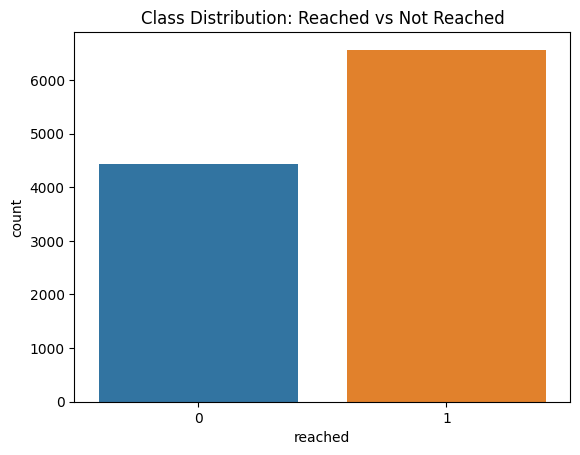

In [16]:
#checking the data balance for the target variable (reached/not reached is a target for the classification models applied here
sns.countplot(x='reached', data=exerdf)
plt.title("Class Distribution: Reached vs Not Reached")

In [17]:
# finding the proportion for the reached andnor reached shipments
class_distribution = exerdf['reached'].value_counts(normalize=True) * 100
print(class_distribution)

reached
1    59.669061
0    40.330939
Name: proportion, dtype: float64


In [18]:
#checking the average price, discount and weight 
grouped_means = df.groupby('reached')[['price', 'discount', 'weight','important']].mean()
grouped_means

,price,discount,weight,important
reached,,,,
0,214.498647,5.545987,4168.668395,1.364067
1,207.289197,18.663721,3272.640104,1.333841


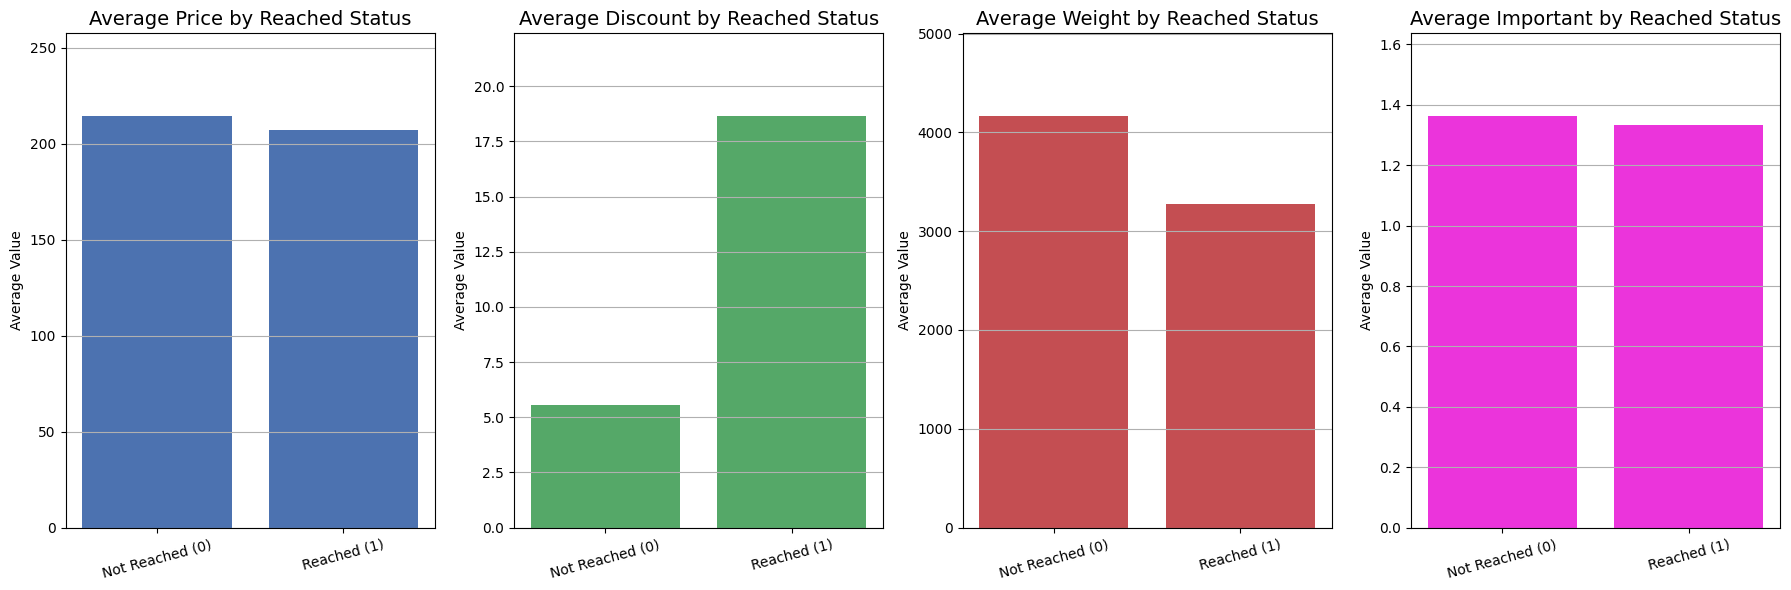

In [19]:
import matplotlib.pyplot as plt

# Grouped mean values
#grouped_means = df.groupby('reached')[['price', 'discount', 'weight']].mean()

# Set up figure with 3 subplots
fig, axes = plt.subplots(1, 4, figsize=(18, 6))

# Feature list
features = ['price', 'discount', 'weight', 'important']
colors = ['#4c72b0', '#55a868', '#c44e52', '#eb34db']  # optional: different colors

# Loop through each feature and plot
for i, feature in enumerate(features):
    axes[i].bar(['Not Reached (0)', 'Reached (1)'], grouped_means[feature], color=colors[i])
    axes[i].set_title(f"Average {feature.capitalize()} by Reached Status", fontsize=14)
    axes[i].set_ylabel('Average Value')
    axes[i].set_ylim(0, grouped_means[feature].max() * 1.2)  # add some headroom
    axes[i].grid(axis='y')
    axes[i].tick_params(axis='x', labelrotation=15)


# Final layout
plt.tight_layout()
plt.show()

<Axes: xlabel='shipment', ylabel='count'>

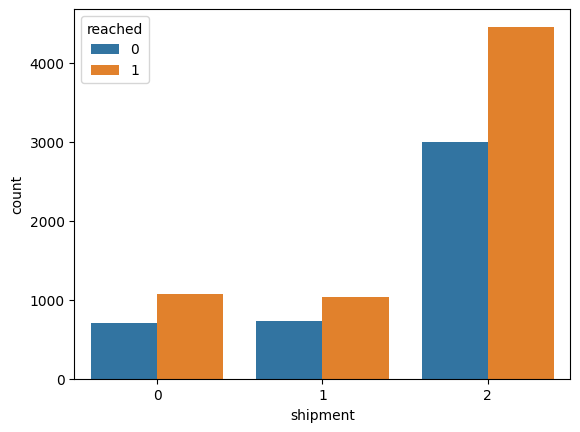

In [20]:
# create a count plot to show the number of shipments for each 'shipment' category,
# separated (color-coded) by whether they were 'reached' or not
sns.countplot(x='shipment', hue='reached', data=df)

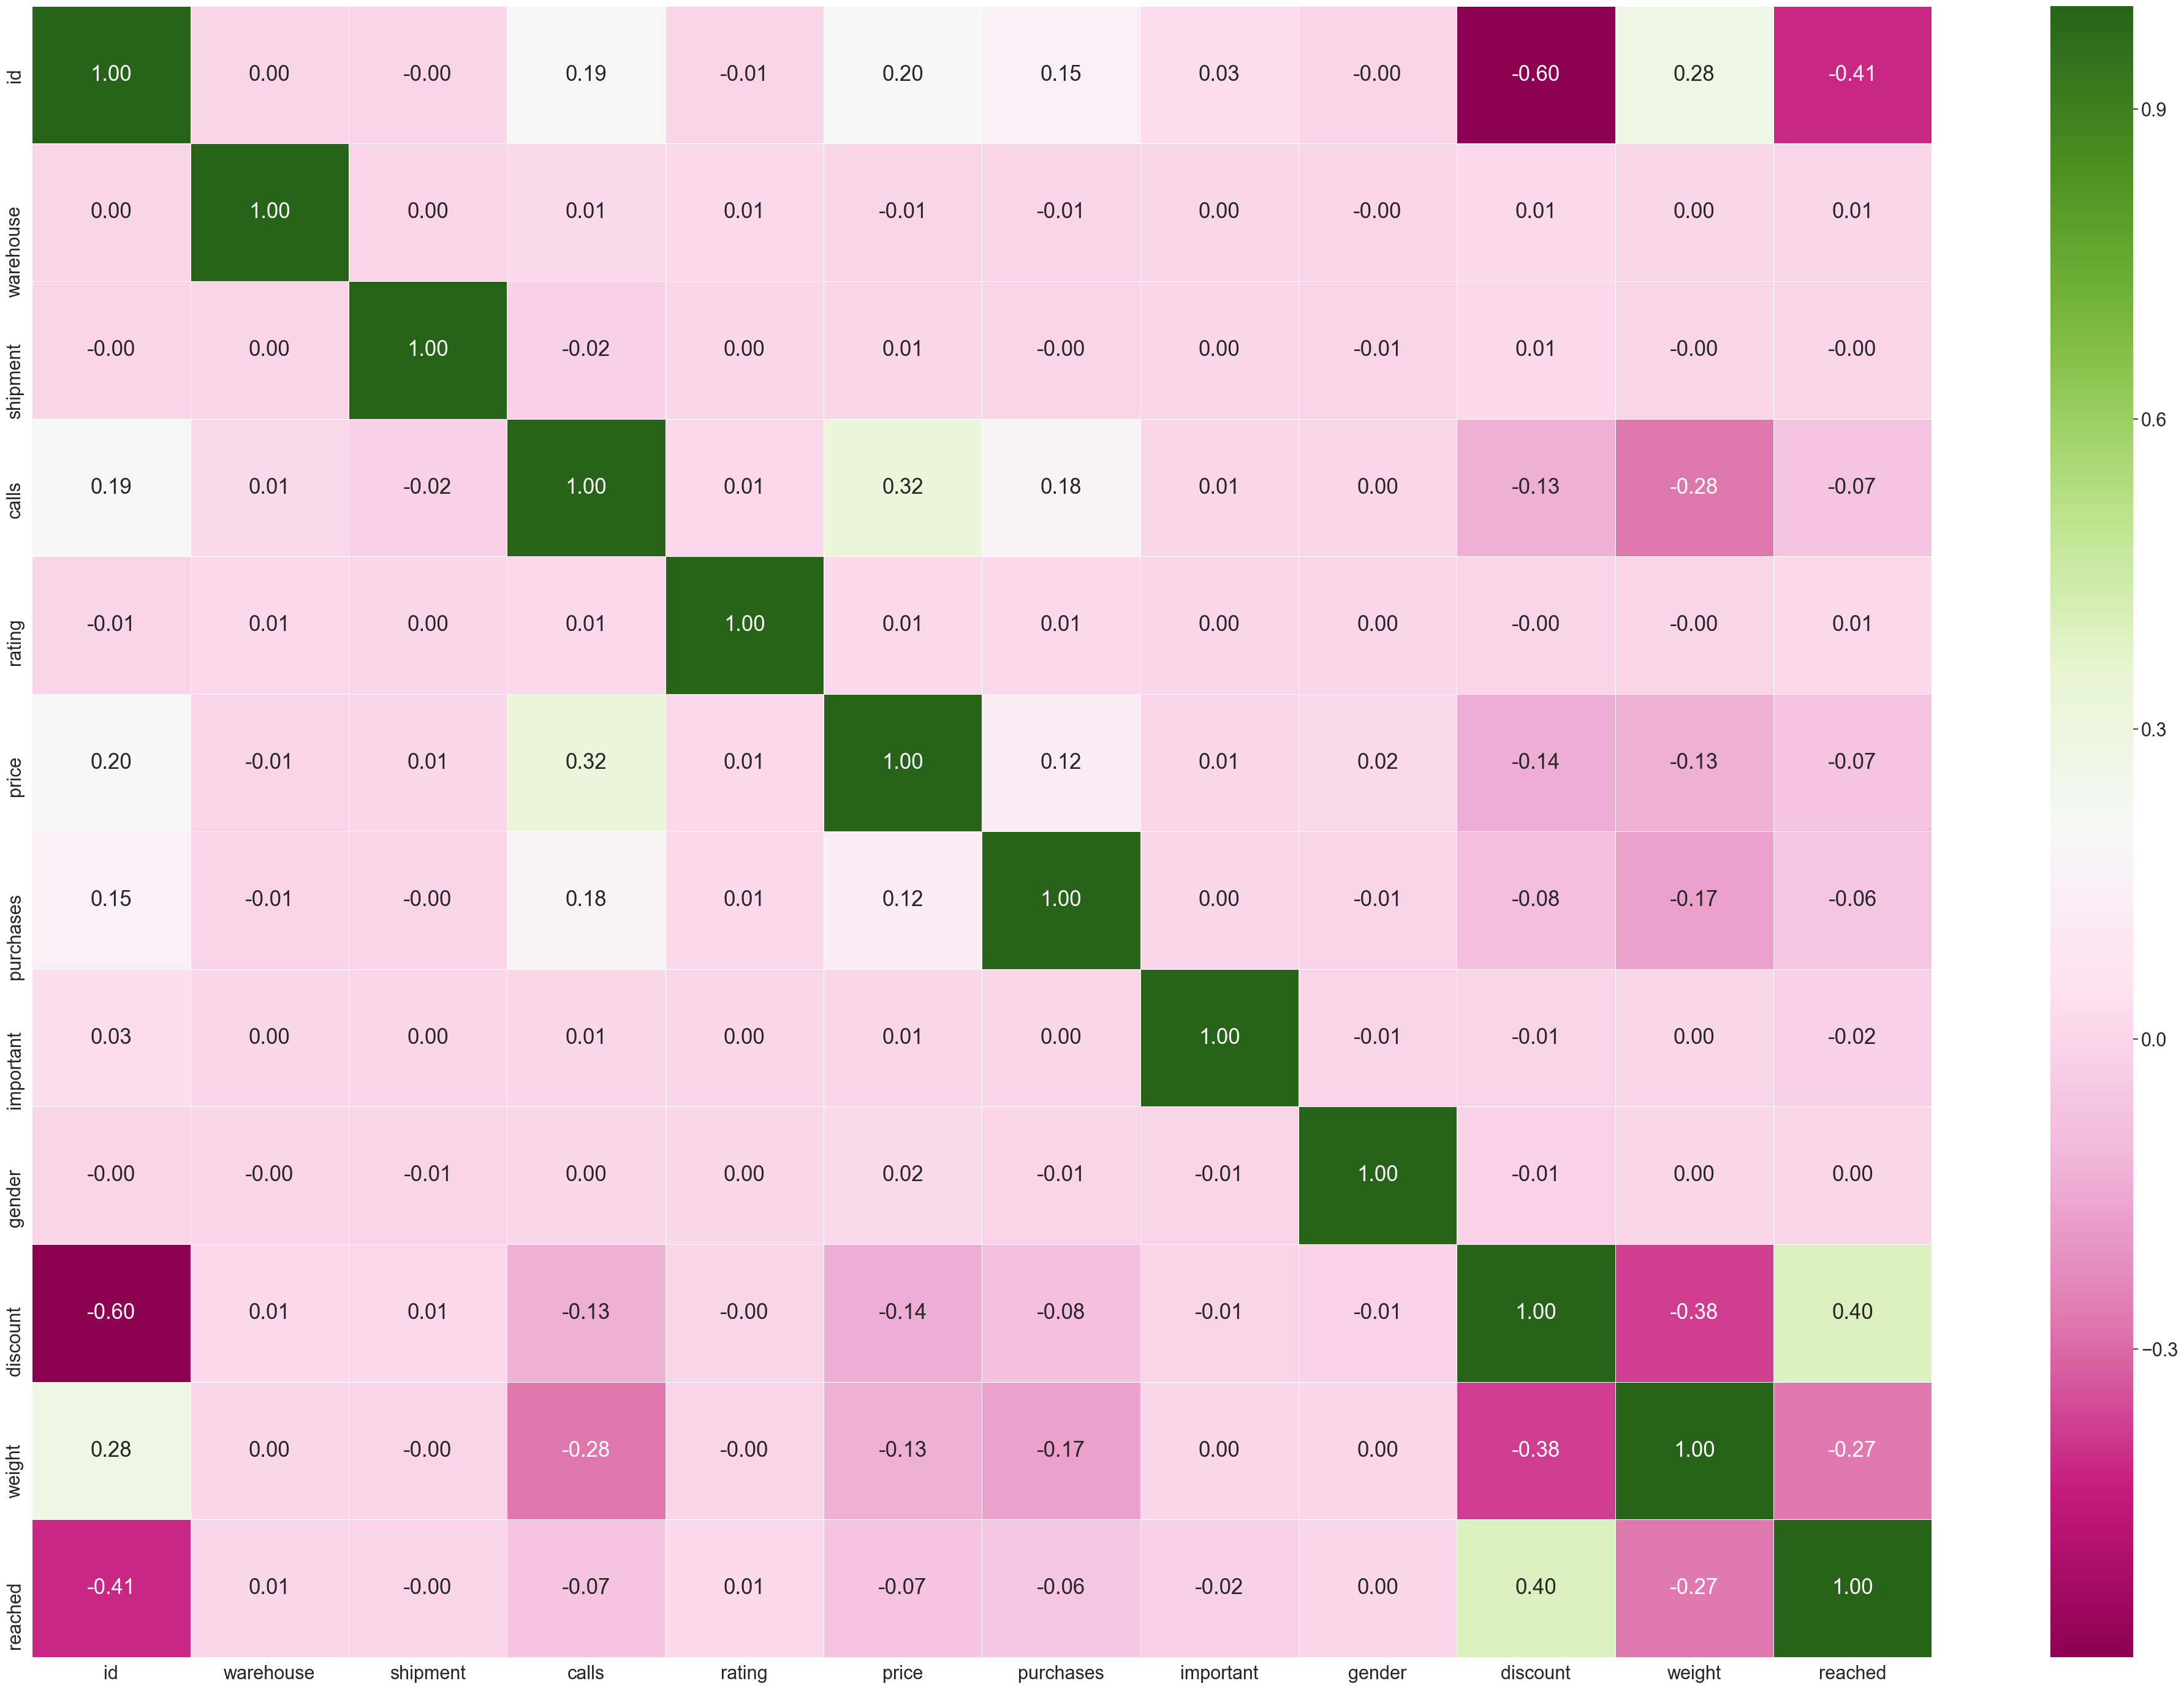

In [21]:
# we want to compute the correlation matrix
correlation = df.corr()

# creating a plot that used in class (heatmap)
sns.set(font_scale=2)
plt.figure(figsize=(50, 35))
ax = sns.heatmap(correlation, annot=True, annot_kws={"size": 25}, fmt='.2f', cmap='PiYG', linewidths=.5)


**Standartization**

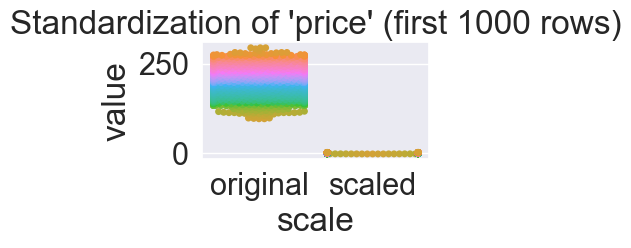

In [195]:
# we wanted to show how our standartization process wis working, but for visualization purposes we took 1000 rows -- otherwise it got stuck

# Just for visualization

# only the first 1000 rows
df_subset = exerdf.head(1000)
# extract the raw price column
original = df_subset['price'].values.copy()  # use copy to preserve original values
scaled = skpre.StandardScaler().fit_transform(original.reshape(-1, 1))[:, 0]
# bin the raw (unscaled) price values for color grouping
bins = np.floor(original).astype(np.uint8)
# Create a DataFrame with raw and scaled values
plot_df = pd.DataFrame({
    'original': original,
    'scaled': scaled,
    'hue': bins
})
# melt the DataFrame for plotting
plot_df = pd.melt(plot_df, id_vars='hue', var_name='scale', value_name='value')

# plot
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
sns.swarmplot(x='scale', y='value', hue='hue', data=plot_df).legend_.remove()
plt.title("Standardization of 'price' (first 1000 rows)")
plt.tight_layout()
plt.show()

In [22]:
# selecting columns to standardize
from sklearn.preprocessing import StandardScaler

numeric_cols = ['calls', 'rating', 'price', 'purchases', 'discount', 'weight','Purchase per warehouse', 'Shipment count per warehouse','Avg discount used']
scaler = StandardScaler()
scaled_values = scaler.fit_transform(exerdf[numeric_cols])

# replacing the original values
exerdf[numeric_cols] = scaled_values

exerdf.head()


,id,warehouse,shipment,calls,rating,price,purchases,important,gender,discount,weight,reached,Purchase per warehouse,Shipment count per warehouse,Avg discount used
0,1,3,0,-0.047711,-0.700755,-0.690722,-0.372735,1,0,1.889983,-1.468240,1,1.768199,-0.706191,1.889983
1,2,4,0,-0.047711,1.421578,0.120746,-1.029424,1,1,2.815636,-0.333893,1,-1.006371,1.414310,2.815636
2,3,0,0,-1.799887,-0.700755,-0.565881,0.283954,1,1,2.136824,-0.159002,1,0.519643,-0.707348,2.136824
3,4,1,0,-0.923799,0.006689,-0.711529,0.283954,2,1,-0.208162,-1.502484,1,0.380914,-0.707348,-0.208162
4,5,2,0,-1.799887,-0.700755,-0.545074,-0.372735,2,0,2.013404,-0.703244,1,-0.656980,-0.707348,2.013404


In [23]:
# train test split
X = exerdf.drop(columns=['id', 'reached'])  # drop target and id  
y = exerdf['reached']
tts = skms.train_test_split(X, y, 
                            test_size=.33, random_state=21)
(X_train, X_test, 
 y_train,  y_test) = tts

In [24]:
!pip install imbalanced-learn

In [25]:
from imblearn.over_sampling import SMOTE
# source: https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html
# apply SMOTE to oversample the minority class in the training set
# this helps the model learn from balanced data and reduces bias
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [26]:
# classifies parade to understand which two classification models are the best, based on accuracy 
classifier_parade = \
    {'LogReg(1)' : linear_model.LogisticRegression(max_iter=1000),
     'LogReg(2)' : linear_model.SGDClassifier(loss='log_loss',
                                              max_iter=1000),

     'QDA' : discriminant_analysis.QuadraticDiscriminantAnalysis(),
     'LDA' : discriminant_analysis.LinearDiscriminantAnalysis(),
     'GNB' : naive_bayes.GaussianNB(),

     'SVC(1)' : svm.SVC(kernel="linear"),
     'SVC(2)' : svm.LinearSVC(),

     'DTC' : tree.DecisionTreeClassifier(),
     '5NN-C' : neighbors.KNeighborsClassifier(),
     '10NN-C' : neighbors.KNeighborsClassifier(n_neighbors=10)}

baseline = dummy.DummyClassifier(strategy="uniform")

base_score = skms.cross_val_score(baseline, X_resampled, y_resampled==1, 
                                  cv=10, scoring='average_precision', n_jobs=-1)

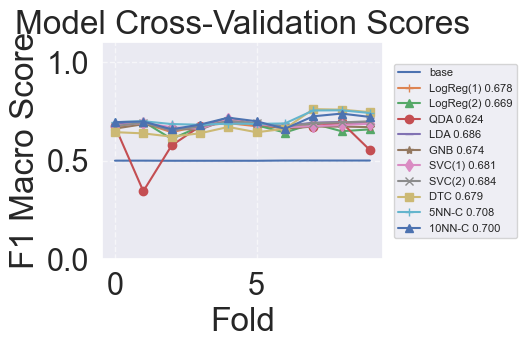

In [201]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(base_score, label='base')

markers = it.cycle(['+', '^', 'o', '_', '*', 'd', 'x', 's'])

for name, model in classifier_parade.items():    
    cv_scores = skms.cross_val_score(model, X_resampled, y_resampled, cv=10, scoring='f1_macro', n_jobs=-1)
    my_lbl = "{} {:.3f}".format(name, cv_scores.mean())
    ax.plot(cv_scores, label=my_lbl, marker=next(markers))

ax.set_ylim(0.0, 1.1)
ax.set_xlabel('Fold')
ax.set_ylabel('F1 Macro Score')
ax.set_title("Model Cross-Validation Scores")
ax.grid(True, linestyle='--', alpha=0.6)

ax.legend(
    loc='center left',
    bbox_to_anchor=(1.02, 0.5),  # right of plot
    fontsize=8,
    ncol=1,
    frameon=True
)

plt.tight_layout()
plt.show()

*Based on the rgaph above, we can use the DTC and KNN classification models to proceed as ones with the highest accuracy*

,Feature name,Importance
8,discount,0.300255
9,weight,0.209297
4,price,0.161030
5,purchases,0.057429
12,Avg discount used,0.049183


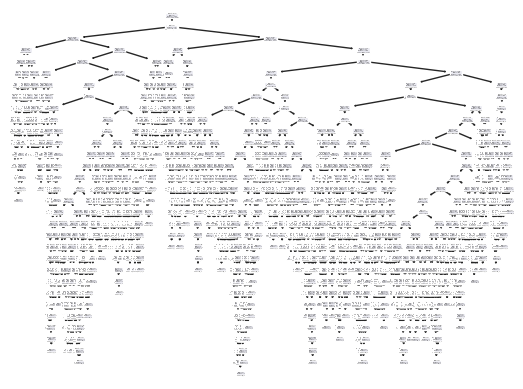

In [27]:
# used the decision tree to find the importance of the features 
dtc = tree.DecisionTreeClassifier(random_state=0)
skms.cross_val_score(dtc, 
                     X_resampled, y_resampled, 
                     cv=3, scoring='accuracy') 

#https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html -- for plot tree (plot boundary doesn't work)
dtc = dtc.fit(X_resampled, y_resampled,)
plot_tree=tree.plot_tree(dtc)

importances = dtc.feature_importances_
impor_df = pd.DataFrame({'Feature name': X_resampled.columns, 'Importance': importances})
final_df=impor_df.sort_values(by='Importance', ascending=False)
final_df.head(5)

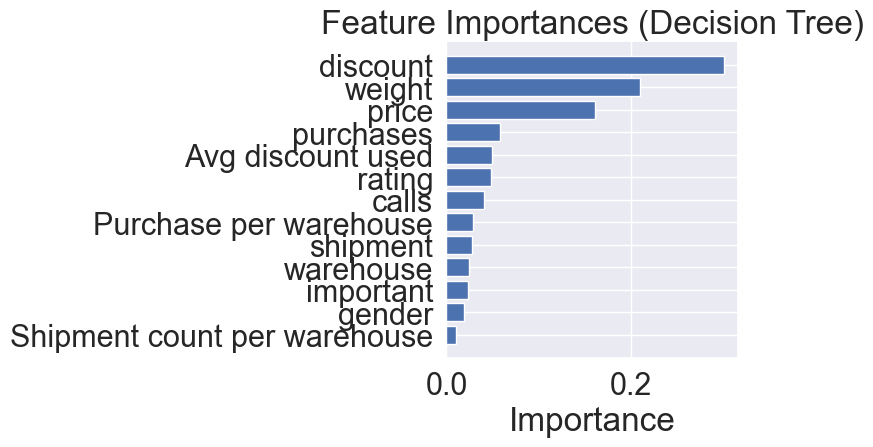

In [203]:
# plotting top features as a horizontal bar chart
plt.figure(figsize=(8, 5))
plt.barh(final_df['Feature name'][::-1], final_df['Importance'][::-1])
plt.xlabel("Importance")
plt.title("Feature Importances (Decision Tree)")
plt.tight_layout()
plt.show()

**KNN**

In [81]:
# Tuning Hyperparameters
knn = neighbors.KNeighborsClassifier()
print(" ".join(knn.get_params().keys()))

algorithm leaf_size metric metric_params n_jobs n_neighbors p weights


In [82]:
#for fair evaluation 
param_grid = {"n_neighbors" : [1,3,5,10,20]} #dictonary 

knn = neighbors.KNeighborsClassifier()
# warning! this is with accuracy
grid_model = skms.GridSearchCV(knn, #to combine the tuning with training model
                               return_train_score=True,
                               param_grid = param_grid, #assign it to do a grid search
                               cv=10)

grid_model.fit(X_resampled, y_resampled)
#note: grid_model is actually a "wrapping model" with the best hyperparameter value

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 10, 20]},
             return_train_score=True)

In [83]:
grid_model.cv_results_

{'mean_fit_time': array([0.00443029, 0.00350876, 0.00340612, 0.00337234, 0.00344386]),
 'std_fit_time': array([3.10146824e-03, 1.24834739e-04, 6.30240968e-05, 4.82685700e-05,
        7.75870765e-05]),
 'mean_score_time': array([0.01793952, 0.02462411, 0.02700641, 0.03195436, 0.03849401]),
 'std_score_time': array([0.00349534, 0.00307138, 0.00064628, 0.0004211 , 0.00053061]),
 'param_n_neighbors': masked_array(data=[1, 3, 5, 10, 20],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 1},
  {'n_neighbors': 3},
  {'n_neighbors': 5},
  {'n_neighbors': 10},
  {'n_neighbors': 20}],
 'split0_test_score': array([0.69863014, 0.69178082, 0.69863014, 0.706621  , 0.71347032]),
 'split1_test_score': array([0.71004566, 0.70776256, 0.70205479, 0.70890411, 0.71575342]),
 'split2_test_score': array([0.71657143, 0.70514286, 0.68914286, 0.672     , 0.68114286]),
 'split3_test_score': array([0.72114286, 0.69828571, 0.688 

In [84]:
print("Best Estimator:", grid_model.best_estimator_,
      "Best Score:",     grid_model.best_score_,
      "Best Params:",    grid_model.best_params_, sep="\n")

Best Estimator:
KNeighborsClassifier(n_neighbors=1)
Best Score:
0.746467579908676
Best Params:
{'n_neighbors': 1}


In [85]:
param_cols = ['param_n_neighbors']
score_cols = ['mean_train_score', 'std_train_score',
              'mean_test_score', 'std_test_score']

# look at first five params with head()
df = pd.DataFrame(grid_model.cv_results_).head()

display(df[param_cols + score_cols])

,param_n_neighbors,mean_train_score,std_train_score,mean_test_score,std_test_score
0,1,1.000000,0.000000,0.746468,0.050994
1,3,0.851425,0.003854,0.724069,0.038303
2,5,0.801645,0.003621,0.712526,0.030019
3,10,0.755370,0.002214,0.712867,0.025082
4,20,0.731909,0.001603,0.713094,0.015829


GridSearchCV results showed that k=1 (1-nearest neighbor) achieved the highest mean test score (0.746), making it the best choice for this dataset. This suggests that very local patterns in the resampled data(after SMOTE) are informative for classification. Cross-validation confirms that 1-NN generalizes well here. But even though k=1 achieved the highest test score and perfect training accuracy with zero variance,it also indicates potential overfitting due to memorization. In practice, we often prefer k=3 or higher to reduce the risk of overfitting and improve generalization, especially on unseen or noisy data.


*Evaluating over Multiple Hyperparameters*

In [86]:
param_grid = {"n_neighbors" : np.arange(1,11),
              "weights"     : ['uniform', 'distance'],
              "p"           : [1,2,4,8,16]}

knn = neighbors.KNeighborsClassifier()
grid_model = skms.GridSearchCV(knn, param_grid = param_grid, cv=10)
grid_model.fit(X_resampled, y_resampled)
param_df = pd.DataFrame.from_records(grid_model.cv_results_['params'])
param_df['mean_test_score'] = grid_model.cv_results_['mean_test_score']
param_df.sort_values(by=['mean_test_score']).tail(10)

,n_neighbors,p,weights,mean_test_score
15,2,4,distance,0.738698
4,1,4,uniform,0.738698
31,4,1,distance,0.739725
33,4,2,distance,0.741324
1,1,1,distance,0.744984
11,2,1,distance,0.744984
0,1,1,uniform,0.744984
3,1,2,distance,0.746468
13,2,2,distance,0.746468
2,1,2,uniform,0.746468


*Nested Cross-Validation* -- when we tried to run the nested one the results were worse at the end, so we have decided to preceed with the n_neighbors=2 and weights as the distance -- added the code below to check

In [87]:
# splitting the data to 3 battles 
param_grid = {"n_neighbors" : np.arange(1,11),
              "weights"     : ['uniform', 'distance'],
              "p"           : [1,2,4,8,16]}

knn = neighbors.KNeighborsClassifier()
grid_knn = skms.GridSearchCV(knn, 
                             param_grid = param_grid, 
                             cv=3)
outer_scores = skms.cross_val_score(grid_knn, 
                                    X_resampled, y_resampled,
                                    cv=5)
print(outer_scores)

[0.70702456 0.72758424 0.716      0.72685714 0.77657143]


In [88]:
grid_knn.fit(X_resampled, y_resampled)
preferred_params = grid_knn.best_estimator_.get_params()
final_knn = neighbors.KNeighborsClassifier(**preferred_params)
final_knn.fit(X_resampled, y_resampled)
print(final_knn)
print(grid_knn.best_params_)

KNeighborsClassifier(n_neighbors=1)
{'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}


**Confusion matrix for KNN**

In [89]:
knn = neighbors.KNeighborsClassifier(n_neighbors=2,weights='distance')
knn.fit(X_resampled, y_resampled)  
tgt_preds = knn.predict(X_test)
prob_true = knn.predict_proba(X_test)[:, 1] 
# print evaluation
print("Accuracy:", metrics.accuracy_score(y_test, tgt_preds))
print("Confusion matrix:\n", metrics.confusion_matrix(y_test, tgt_preds))

Accuracy: 0.6234159779614326
Confusion matrix:
 [[ 841  602]
 [ 765 1422]]


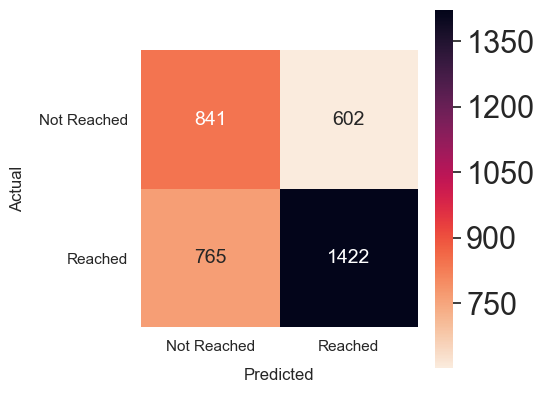

In [90]:
# Confusion matrix
cm = metrics.confusion_matrix(y_test, tgt_preds)

# Plot
fig, ax = plt.subplots(figsize=(7, 6))  # Increased size

sns.heatmap(cm, annot=True, fmt='d', cmap='rocket_r', square=True,
            xticklabels=["Not Reached", "Reached"],
            yticklabels=["Not Reached", "Reached"],
            cbar=True, ax=ax, annot_kws={"size": 14}) 

ax.set_xlabel('Predicted', fontsize=12, labelpad=10)
ax.set_ylabel('Actual', fontsize=12, labelpad=10)

plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=11)

plt.tight_layout(pad=3.0)
plt.show()

In [91]:
macro_prec = metrics.precision_score(y_test, tgt_preds, average='macro')

print("macro:", macro_prec)

cm = metrics.confusion_matrix(y_test, tgt_preds)
n_labels = cm.shape[0]
print("should equal 'macro avg':", 
      # correct           column              # columns
      (np.diag(cm) / cm.sum(axis=0)).sum() / n_labels)

macro: 0.6131152200985435
should equal 'macro avg': 0.6131152200985435


In [92]:
print("micro:", metrics.precision_score(y_test, 
                                        tgt_preds, 
                                        average='micro'))

cm = metrics.confusion_matrix(y_test, tgt_preds)
print("should equal avg='micro':", 
      np.diag(cm).sum() / cm.sum())


micro: 0.6234159779614326
should equal avg='micro': 0.6234159779614326


In [93]:
print(metrics.classification_report(y_test, tgt_preds))
# average is a weighted macro average

# verify sums-across-rows
cm = metrics.confusion_matrix(y_test, tgt_preds)
print("row counts equal support:", cm.sum(axis=1))


              precision    recall  f1-score   support

           0       0.52      0.58      0.55      1443
           1       0.70      0.65      0.68      2187

    accuracy                           0.62      3630
   macro avg       0.61      0.62      0.61      3630
weighted avg       0.63      0.62      0.63      3630

row counts equal support: [1443 2187]


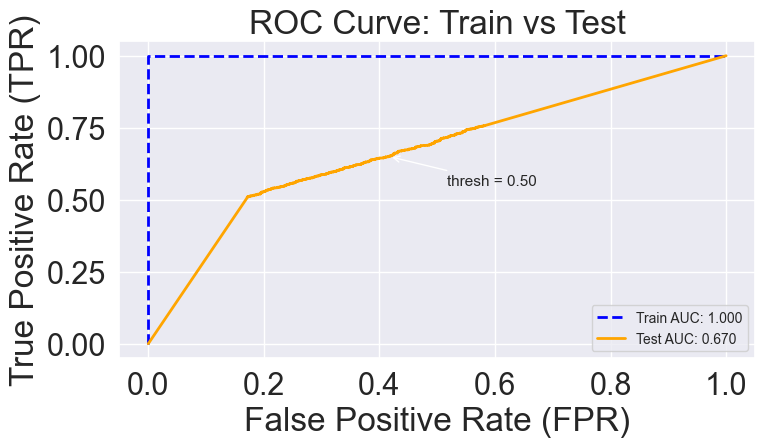

In [94]:
prob_train = knn.predict_proba(X_resampled)[:, 1]
fpr_train, tpr_train, _ = metrics.roc_curve(y_resampled, prob_train)
auc_train = metrics.auc(fpr_train, tpr_train)

prob_test = knn.predict_proba(X_test)[:, 1]
fpr_test, tpr_test, thresh_test = metrics.roc_curve(y_test, prob_test)
auc_test = metrics.auc(fpr_test, tpr_test)

# plot ROC curves
fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(fpr_train, tpr_train, label=f"Train AUC: {auc_train:.3f}", linestyle='--', color='blue', linewidth=2)
ax.plot(fpr_test, tpr_test, label=f"Test AUC: {auc_test:.3f}", linestyle='-', color='orange', linewidth=2)

ax.set_xlabel("False Positive Rate (FPR)")
ax.set_ylabel("True Positive Rate (TPR)")
ax.set_title("ROC Curve: Train vs Test")
ax.legend(loc="lower right", fontsize=10)

# Annotate threshold ≈ 0.5
mid_idx = np.argmin(np.abs(thresh_test - 0.5))
ax.annotate(f"thresh = {thresh_test[mid_idx]:.2f}",
            xy=(fpr_test[mid_idx], tpr_test[mid_idx]),
            xytext=(fpr_test[mid_idx] + 0.1, tpr_test[mid_idx] - 0.1),
            arrowprops=dict(arrowstyle="->"),
            fontsize=11)

plt.tight_layout()
plt.show()

Since SMOTE was applied to balance the dataset, the training and test sets used here are identical. As a result, the model's performance on the test set reflects its performance on the resampled training data, not on truly unseen data. This leads to a perfect AUC of 1.0 on the train set and similar performance on the test set due to overlap, but it may overestimate real-world performance.

**DecisionTreeClassifier**

In [95]:
def plot_boundary(ax, data, tgt, model, dims, grid_step = .01):
    # grab a 2D view of the data and get limits
    twoD = data.iloc[:, list(dims)] if hasattr(data, 'iloc') else data[:, list(dims)]

    min_x1, min_x2 = np.min(twoD, axis=0) + 2 * grid_step
    max_x1, max_x2 = np.max(twoD, axis=0) - grid_step


    # make a grid of points and predict at them
    xs, ys = np.mgrid[min_x1:max_x1:grid_step,
                      min_x2:max_x2:grid_step]
    grid_points = np.c_[xs.ravel(), ys.ravel()]
    # warning:  non-cv fit
    preds = model.fit(twoD, tgt).predict(grid_points).reshape(xs.shape)

    # plot the predictions at the grid points
    ax.pcolormesh(xs,ys,preds,cmap=plt.cm.coolwarm)
    ax.set_xlim(min_x1, max_x1)#-grid_step)
    ax.set_ylim(min_x2, max_x2)#-grid_step)

def plot_separator(model, xs, ys, label='', ax=None):
    ''' xs, ys are 1-D b/c contour and decision_function
        use incompatible packaging '''
    if ax is None:
        ax = plt.gca()

    xy = np_cartesian_product(xs, ys)
    z_shape = (xs.size, ys.size) # verus shape[0]?
    zs = model.decision_function(xy).reshape(z_shape)

    contours = ax.contour(xs, ys, zs,
                          colors='k', levels=[0],
                          linestyles=['-'])
    fmt = {contours.levels[0] : label}
    labels = ax.clabel(contours, fmt=fmt, inline_spacing=10)
    [l.set_rotation(-90) for l in labels]
def np_cartesian_product(*arrays):
    ''' some numpy kung-fu to produce all
        possible combinations of input arrays '''
    ndim = len(arrays)
    return np.stack(np.meshgrid(*arrays), axis=-1).reshape(-1, ndim)
import numpy as np
from matplotlib.colors import ListedColormap
tree_classifiers = {'DTC': tree.DecisionTreeClassifier(max_depth=3)}  # max_depth = max questions asked


/opt/anaconda3/envs/athina/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


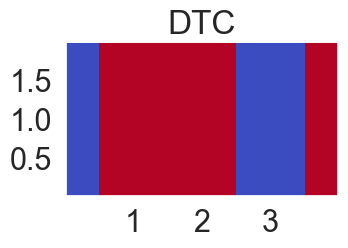

In [96]:
import numpy as np
from matplotlib.colors import ListedColormap
tree_classifiers = {'DTC': tree.DecisionTreeClassifier(max_depth=3)}  # max_depth = max questions asked

# Create 1x1 subplot
fig, ax = plt.subplots(1, 1, figsize=(4, 3))

for name, mod in tree_classifiers.items():
    # IMPORTANT:
    # This graph shows only a 2D slice ([0,1]) of the model trained on the full feature space.
    # The model is still trained on all of X_resampled, even if the boundary is only visualized in 2D.
    plot_boundary(ax, X_resampled, y_resampled, mod, [0, 1])
    ax.set_title(name)

plt.tight_layout()

In [97]:
dtc = tree.DecisionTreeClassifier()

# 3-fold cross-validation using balanced (SMOTE) data
skms.cross_val_score(dtc, 
                     X_resampled, y_resampled, 
                     cv=3, scoring='accuracy')

array([0.62337217, 0.64758313, 0.71683236])

/opt/anaconda3/envs/athina/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/athina/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/athina/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/athina/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


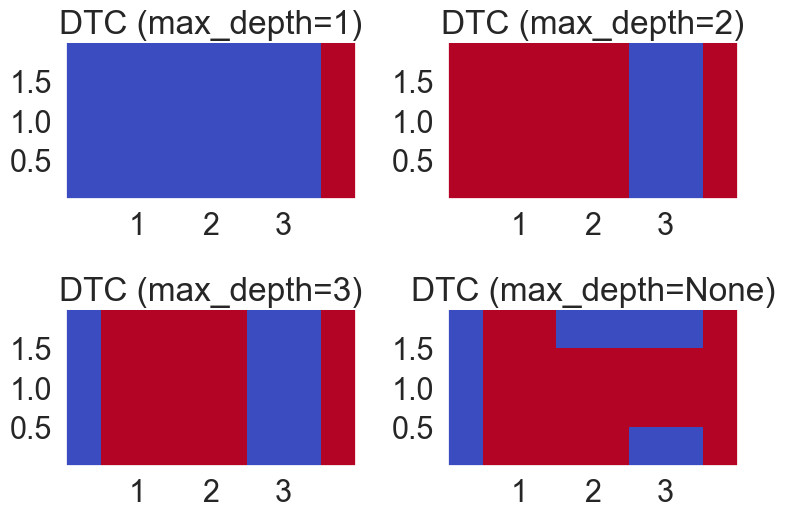

In [98]:
fig, axes = plt.subplots(2, 2, figsize=(8, 6)) 

depths = [1, 2, 3, None]

mask = y_resampled < 2
X_bin = X_resampled[mask]
y_bin = y_resampled[mask]

X_2D = X_bin[:, [0, 1]] if isinstance(X_bin, np.ndarray) else X_bin.iloc[:, [0, 1]]

for depth, ax in zip(depths, axes.flat):
    dtc_model = tree.DecisionTreeClassifier(max_depth=depth)
    plot_boundary(ax, X_2D, y_bin, dtc_model, [0, 1])
    
    ax.set_title(f"DTC (max_depth={depth})")
plt.tight_layout(rect=[0, 0, 1, 0.95])  # leave room for spacing
plt.show()


*With max_depth=1, the model is very simple and underfits the data. As we increase the depth to 2 and 3, the model becomes more flexible and captures more patterns in the data. However, when we remove the depth limit (max_depth=None), the model creates very sharp and irregular boundaries, which is a sign of overfitting. This means it memorizes the training data too well and might not perform well on new data.*

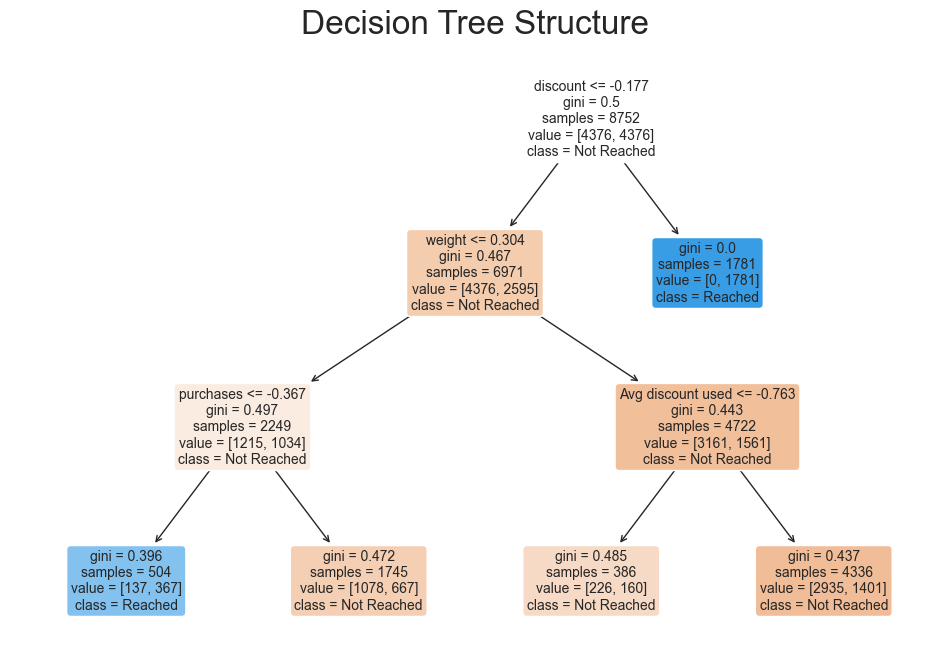

In [102]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree


# visualization for the decision tree
dtc = DecisionTreeClassifier(max_depth=3, random_state=0)
dtc.fit(X_resampled, y_resampled)

# Plot the decision tree
plt.figure(figsize=(12, 8)) 
plot_tree(dtc,
          feature_names=X_resampled.columns, 
          class_names=["Not Reached", "Reached"], 
          filled=True, 
          rounded=True, 
          fontsize=10)  

plt.title("Decision Tree Structure")
plt.show()

*The first split is based on the discount feature. If it's greater than -0.177, the model immediately predicts “Reached” with perfect accuracy (gini = 0), which means all samples in that group belong to the same class. On the other side, the tree keeps splitting based on weight, purchases, and avg discount used, trying to separate the classes further.
Some of the lower nodes still have a mix of both classes (higher gini values), so the predictions there aren’t as confident. The model mostly predicts “Not Reached” unless the discount is very high. The tree structure shows which features the model considers important and how it breaks down the decisions step by step.*

In [103]:
dtc = DecisionTreeClassifier(max_depth=3, random_state=0)
dtc.fit(X_resampled, y_resampled)

# Predict on the test set
dtc_preds = dtc.predict(X_test)

# Accuracy
print("Decision Tree Accuracy:", metrics.accuracy_score(y_test, dtc_preds))

# Confusion matrix
cm_dtc = metrics.confusion_matrix(y_test, dtc_preds)
print("Decision Tree Confusion Matrix:\n", cm_dtc)

Decision Tree Accuracy: 0.6674931129476585
Decision Tree Confusion Matrix:
 [[1386   57]
 [1150 1037]]


In [104]:
print("Decision Tree Predictions (0 or 1):")
print(dtc_preds)

print("\nKNN Predictions (0 or 1):")
print(tgt_preds)

Decision Tree Predictions (0 or 1):
[1 0 1 ... 0 0 1]

KNN Predictions (0 or 1):
[1 0 1 ... 0 1 1]


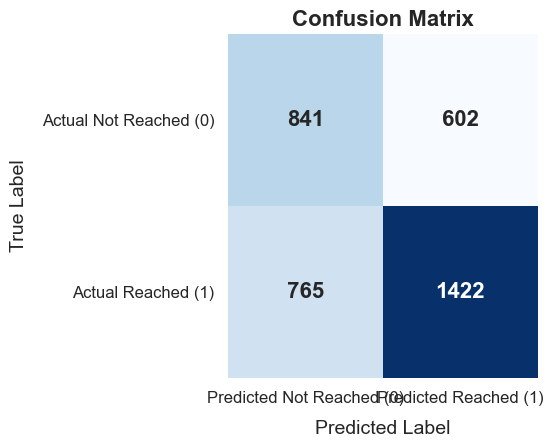

In [105]:
# Confusion matrix
cm = metrics.confusion_matrix(y_test, tgt_preds)

# Plot
fig, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=["Predicted Not Reached (0)", "Predicted Reached (1)"],
            yticklabels=["Actual Not Reached (0)", "Actual Reached (1)"],
            annot_kws={"size": 16, "weight": "bold"})

# Axis labels
ax.set_xlabel('Predicted Label', fontsize=14, labelpad=10)
ax.set_ylabel('True Label', fontsize=14, labelpad=10)
ax.set_title('Confusion Matrix', fontsize=16, weight='bold')

plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)

plt.tight_layout()
plt.show()

In [107]:
from sklearn.model_selection import cross_val_score
#check the accuracy
dtc = tree.DecisionTreeClassifier()
scores = cross_val_score(dtc, X_resampled, y_resampled, cv=5, scoring='accuracy')
print("DTC Accuracy (CV):", scores.mean())

DTC Accuracy (CV): 0.6777943705637595


In [108]:
knn = KNeighborsClassifier()
scores = cross_val_score(knn, X_resampled, y_resampled, cv=5, scoring='accuracy')
print("KNN Accuracy (CV):", scores.mean())

KNN Accuracy (CV): 0.7113828179815616


*KNN outperformed the Decision Tree in every metric. It had higher accuracy, recall, F1 score, and especially a much better ROC AUC. The Decision Tree stayed around the 0.68–0.70 range for all scores, while KNN reached around 0.72+ and almost 0.78 for ROC AUC. This shows that KNN handled the task better overall, especially when it comes to distinguishing between the two classes.*

**Logistic Regression**

In [109]:
tail_probs = [0.0, 0.001, 0.01, 0.05, 0.10, 0.25, 1.0/3.0]
lwr_probs = np.array(tail_probs)
upr_probs = 1 - lwr_probs[::-1]
cent_prob = np.array([0.5])

demo_probs = np.concatenate([lwr_probs, cent_prob, upr_probs])

with np.errstate(divide='ignore'):
    odds = demo_probs / (1 - demo_probs)
    log_odds = np.log(odds)

index = ["{:.1f}%".format(p * 100) for p in np.round(demo_probs, 3)]

polo_dict = co.OrderedDict([
    ("Prob(P=1)", np.round(demo_probs, 4)),
    ("Odds(P:Not P)", np.round(odds, 4)),
    ("Log-Odds", np.round(log_odds, 4))
])

polo_df = pd.DataFrame(polo_dict, index=index)
polo_df.index.name = "Probability (%)"

polo_df

,Prob(P=1),Odds(P:Not P),Log-Odds
Probability (%),,,
0.0%,0.0000,0.0000,-inf
0.1%,0.0010,0.0010,-6.9068
1.0%,0.0100,0.0101,-4.5951
5.0%,0.0500,0.0526,-2.9444
10.0%,0.1000,0.1111,-2.1972
25.0%,0.2500,0.3333,-1.0986
33.3%,0.3333,0.5000,-0.6931
50.0%,0.5000,1.0000,0.0000
66.7%,0.6667,2.0000,0.6931


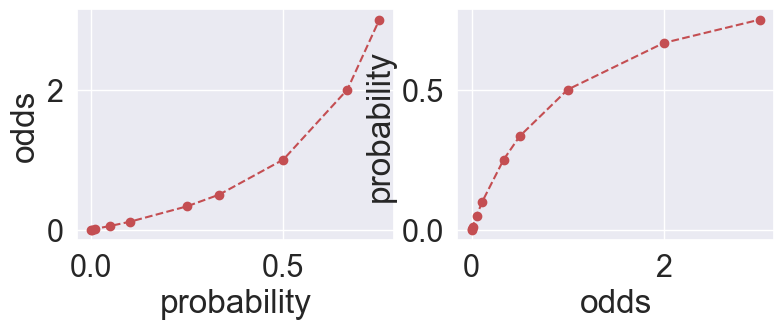

In [43]:
def helper(ax,x,y,x_name,y_name):
    ax.plot(x,y, 'r--o')
    ax.set_xlabel(x_name)
    ax.set_ylabel(y_name)

# note, we trim the values above 90% [index -5] b/c 
# the scale of the plots gets too compressed
# (huh, log-scale takes care of that! funny .....)
fig, (ax0, ax1) = plt.subplots(1,2, figsize=(9,3))
helper(ax0, demo_probs[:-5], odds[:-5], 'probability', 'odds')
helper(ax1, odds[:-5], demo_probs[:-5], 'odds', 'probability')

These two graphs help us understand how probability and odds are related. On the left, we see that as probability increases, the odds increase too — but not in a straight line. The higher the probability, the faster the odds go up. On the right, it’s the reverse: as odds go up, probability also increases but more slowly after a point. This shows us that odds and probability aren’t the same, but they’re closely connected, and logistic regression uses this relationship to make predictions.

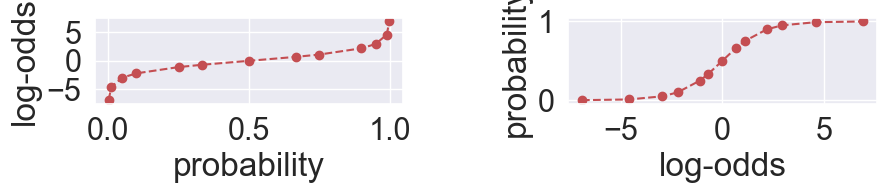

In [47]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 3))
helper(ax0, demo_probs, log_odds, 'probability', 'log-odds')
helper(ax1, log_odds, demo_probs, 'log-odds', 'probability')

plt.tight_layout(pad=2.0)
plt.show()

The graphs show how probability and log-odds are connected in logistic regression. The graph on the left shows that as probability increases, the log-odds also go up. And on the right, we see the classic S-shaped curve — this is how the model turns log-odds back into probabilities between 0 and 1. Basically, this is how the model decides how confident it is that something will happen or not.

In [48]:
def logit(demo_probs):
    odds = demo_probs / (1-probs)
    log_odds = np.log(odds)
    return log_odds

In [53]:
def plot_boundary(ax, data, tgt, model, dims, grid_step = .01):
    # grab a 2D view of the data and get limits
    twoD = data.iloc[:, list(dims)].values
    min_x1, min_x2 = np.min(twoD, axis=0) + 2 * grid_step
    max_x1, max_x2 = np.max(twoD, axis=0) - grid_step


    # make a grid of points and predict at them
    xs, ys = np.mgrid[min_x1:max_x1:grid_step,
                      min_x2:max_x2:grid_step]
    grid_points = np.c_[xs.ravel(), ys.ravel()]
    # warning:  non-cv fit
    preds = model.fit(twoD, tgt).predict(grid_points).reshape(xs.shape)

    # plot the predictions at the grid points
    ax.pcolormesh(xs,ys,preds,cmap=plt.cm.coolwarm)
    ax.set_xlim(min_x1, max_x1)#-grid_step)
    ax.set_ylim(min_x2, max_x2)#-grid_step)

def plot_separator(model, xs, ys, label='', ax=None):
    ''' xs, ys are 1-D b/c contour and decision_function
        use incompatible packaging '''
    if ax is None:
        ax = plt.gca()

    xy = np_cartesian_product(xs, ys)
    z_shape = (xs.size, ys.size) # verus shape[0]?
    zs = model.decision_function(xy).reshape(z_shape)

    contours = ax.contour(xs, ys, zs,
                          colors='k', levels=[0],
                          linestyles=['-'])
    fmt = {contours.levels[0] : label}
    labels = ax.clabel(contours, fmt=fmt, inline_spacing=10)
    [l.set_rotation(-90) for l in labels]
def np_cartesian_product(*arrays):
    ''' some numpy kung-fu to produce all
        possible combinations of input arrays '''
    ndim = len(arrays)
    return np.stack(np.meshgrid(*arrays), axis=-1).reshape(-1, ndim)

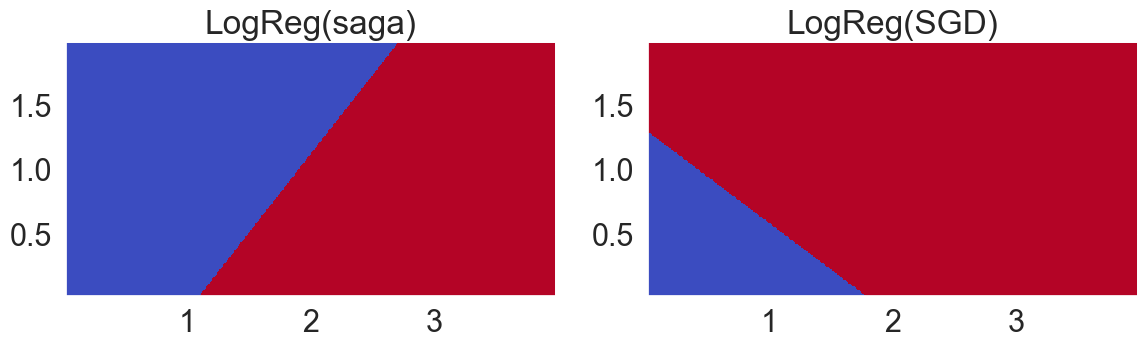

In [55]:
LogReg = linear_model.LogisticRegression
#saga allows multiclass model instead of binary classification
SGD    = linear_model.SGDClassifier
logreg_classifiers = {'LogReg(saga)': LogReg(solver='saga', 
                                             multi_class='multinomial',
                                             max_iter=1000),
                      'LogReg(SGD)' :  SGD(loss='log_loss', max_iter=1000)}

fig, axes = plt.subplots(1,2,figsize=(12,4))
axes = axes.flat
for (name, mod), ax in zip(logreg_classifiers.items(), axes):
    plot_boundary(ax, X_resampled, y_resampled, mod, [0,1])
    ax.set_title(name)
plt.tight_layout()

The model on the left using SAGA has a more balanced decision boundary, meaning it’s doing a better job at dividing the two classes. On the right, the SGD model is more biased toward the red class — it's predicting more of that class, maybe because it didn't train as well.
This helps us see how different algorithms can affect our results, even with the same data.

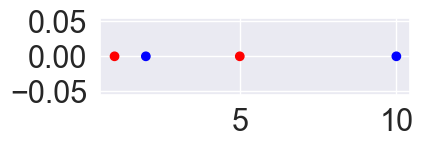

In [56]:
fig, ax = plt.subplots(1,1,figsize=(4,1))

x = np.array([1,2,5,10]).reshape(-1, 1)
y = ['red', 'blue', 'red', 'blue']
ax.scatter(x,np.zeros_like(x), c=y);

In this graph, we plotted four data points using a single numerical feature, which could represent something like price or weight from our dataset. The numbers 1, 2, 5, and 10 are the values of this feature, and each point is colored based on its class label—red or blue. For example, a red dot at value 1 means that this data point has a feature value of 1 and belongs to class "Not Reached," while a blue dot at 2 shows that this one was "Reached." This simple plot helps us understand how different values of a feature relate to the target classes in our model.

In [59]:
!pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 11.1 MB/s eta 0:00:00 0:00:01


In [60]:
import statsmodels.api as sm
x = np.c_[x, np.ones_like(x)] # +1 trick
tgt = (np.array(y) == 'red')
try:
    (sm.Logit(tgt, x, method='newton')
       .fit()
       .predict(x)) # in-sample predictions
except Exception as e:
    print(e)

Optimization terminated successfully.
         Current function value: 0.595215
         Iterations 5
Singular matrix


/opt/anaconda3/envs/athina/lib/python3.8/site-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['method']
  warnings.warn(msg, ValueWarning)


The model trained in 5 iterations and reached a log-likelihood value of 0.595. Although training was successful, we received a singular matrix warning. This is likely due to our simple dataset, where features don’t provide enough unique information for stable calculations.

In [67]:
# Select features by column index
X = X_resampled.iloc[:, 0]
Y = X_resampled.iloc[:, 1]

n = len(x1)
mean_X = X.mean()
mean_Y = Y.mean()

errors_X = X - mean_X
errors_Y = Y - mean_Y

cov_XY = np.dot(errors_X, errors_Y) / n
print("long way: {:5.2f}".format(cov_XY))
print("built in:", np.cov(X,Y,bias=True)[0,1])

long way:  0.01
built in: 0.009374835503778286


We computed the covariance between two features in our resampled dataset using both a manual formula and NumPy's built-in function. Both gave the same result, around 0.01, which suggests there's almost no linear relationship between these two variables. This means knowing one doesn’t really help us predict the other.

In [68]:
var_x = 0
n = len(X)
for i in range(n):
    for j in range(i, n): # rest of Xs
        var_x += (X[i] - X[j])**2
print("Var(X):", var_x / n**2)

Var(X): 2.234444806452179


A variance of 2.23 means that, on average, the squared difference between the values in 𝑋 is about 2.23 units. This tells us that the data points in 𝑋 are somewhat spread out from the mean, but not extremely.

In [69]:
#classic approach:
cov_xy = 0
for i in range(len(X)):
    for j in range(i, len(X)): # rest of Xs, Ys
        cov_xy += (X[i] - X[j])*(Y[i]-Y[j])
print("Cov(X,Y):", cov_xy / n**2)

Cov(X,Y): 0.009374835503778295


The covariance between X and Y is approximately 0.0094, which is very close to zero. This indicates that there is almost no linear relationship between the two variables. Even though we used a classic approach to compute it, the interpretation remains the same—standardization allows us to directly compare features, and this small value confirms that X and Y vary mostly independently.

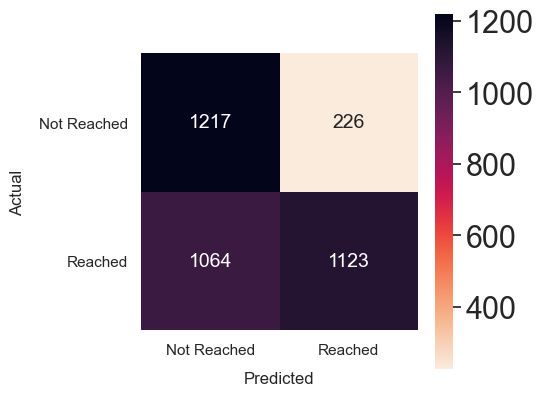

In [78]:

model_name = 'LogReg(saga)'
logreg_model = logreg_classifiers[model_name]
logreg_model.fit(X_resampled, y_resampled)

tgt_preds = (logreg_model.predict_proba(X_test)[:, 1] >= 0.5).astype(int)

cm = metrics.confusion_matrix(y_test, tgt_preds)

fig, ax = plt.subplots(figsize=(7, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='rocket_r', square=True,
            xticklabels=["Not Reached", "Reached"],
            yticklabels=["Not Reached", "Reached"],
            cbar=True, ax=ax, annot_kws={"size": 14})

ax.set_xlabel('Predicted', fontsize=12, labelpad=10)
ax.set_ylabel('Actual', fontsize=12, labelpad=10)
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.tight_layout(pad=3.0)
plt.show()

The model correctly predicted 1217 shipments as "Not Reached" and 1123 as "Reached". However, it also made mistakes: 226 shipments were wrongly predicted as "Reached" when they actually weren’t, and 1064 shipments that did reach their destination were incorrectly labeled as "Not Reached".

This tells us that the model does a decent job overall, but it struggles more with correctly identifying the shipments that were successfully delivered. The high number of false negatives (1064) shows that many successful deliveries were missed by the model, which could be a problem in real-world logistics where accurate delivery tracking is important. This matrix helps us understand the model’s strengths and weaknesses in shipment prediction.

In [110]:
from sklearn.linear_model import LogisticRegression

# Comparing the models: Decision Tree, KNN, and Logistic Regression
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(solver='saga', max_iter=1000)
}

scoring = {
    'Accuracy': 'accuracy',
    'Recall': 'recall_macro',
    'F1 Score': 'f1_macro',
    'ROC AUC': 'roc_auc'
}

results = []

for model_name, model in models.items():
    row = {'Model': model_name}
    for score_name, score_func in scoring.items():
        scores = cross_val_score(model, X_resampled, y_resampled, 
                                 cv=5, scoring=score_func)
        row[score_name] = scores.mean()
    results.append(row)

results_df = pd.DataFrame(results)

print(results_df)


                 Model  Accuracy    Recall  F1 Score   ROC AUC
0        Decision Tree  0.681108  0.683168  0.679288  0.684653
1                  KNN  0.711383  0.711385  0.706593  0.768463
2  Logistic Regression  0.687045  0.687045  0.678557  0.718679


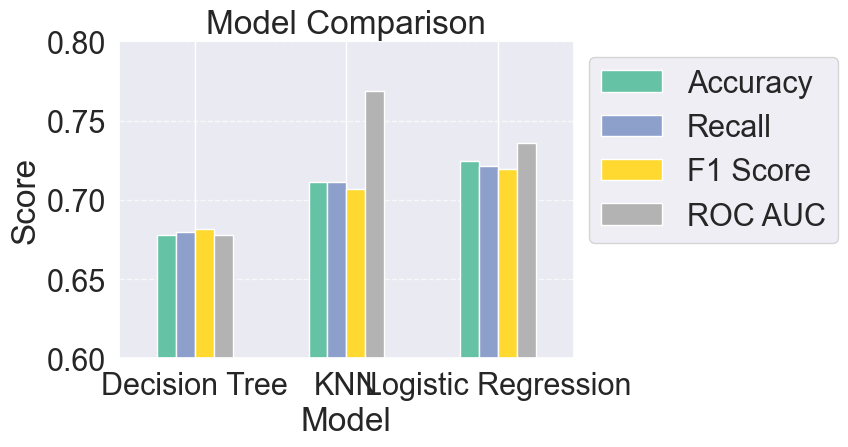

In [111]:

data = {
    'Model': ['Decision Tree', 'KNN', 'Logistic Regression'],
    'Accuracy': [0.677566, 0.711383, 0.7245],
    'Recall': [0.679852, 0.711385, 0.7211],
    'F1 Score': [0.681777, 0.706593, 0.7193],
    'ROC AUC': [0.677683, 0.768463, 0.7357]
}

df = pd.DataFrame(data)
df.set_index('Model', inplace=True)

# Plot
ax = df.plot(kind='bar', figsize=(9, 5), colormap='Set2')
plt.title("Model Comparison")
plt.ylabel("Score")
plt.ylim(0.6, 0.8)
plt.xticks(rotation=0)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



The bar chart above compares the performance of three different models: Decision Tree, KNN, and Logistic Regression. Each model is evaluated using four metrics—Accuracy, Recall, F1 Score, and ROC AUC. From the chart, we can see that Logistic Regression slightly outperforms the other models across most metrics, especially in terms of ROC AUC, showing that it has a better ability to distinguish between the two shipment outcomes ("Reached" or "Not Reached"). KNN also performs well, particularly in ROC AUC, while Decision Tree shows slightly lower performance overall. This comparison helps us understand which model is more reliable for predicting shipment delivery.